In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_Columns',None)

In [56]:
data = pd.read_csv('Super_Store-1.csv', encoding= 'unicode_escape')
data.reset_index(drop=True, inplace= True)
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [57]:
new_data = data[['Order Date', 'Ship Mode', 'Segment','Category' , 'Sub-Category','Sales','Quantity','Discount','Profit']]
new_data.head()

,Order Date,Ship Mode,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,11/8/2016,Second Class,Consumer,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,11/8/2016,Second Class,Consumer,Furniture,Chairs,731.9400,3,0.00,219.5820
2,10/11/2015,Standard Class,Consumer,Furniture,Tables,957.5775,5,0.45,-383.0310
3,6/9/2014,Standard Class,Consumer,Furniture,Furnishings,48.8600,7,0.00,14.1694
4,6/9/2014,Standard Class,Consumer,Furniture,Tables,1706.1840,9,0.20,85.3092


In [58]:
new_data['Order Date'] = pd.to_datetime(new_data['Order Date'])
#new_data['Order Date'] = new_data['Order Date'].apply(lambda x : x.strftime('%Y-%m-%d'))


In [59]:
# new_data['Order Date'] = pd.to_datetime(new_data['Order Date'])

In [60]:
new_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    2121 non-null   datetime64[ns]
 1   Ship Mode     2121 non-null   object        
 2   Segment       2121 non-null   object        
 3   Category      2121 non-null   object        
 4   Sub-Category  2121 non-null   object        
 5   Sales         2121 non-null   float64       
 6   Quantity      2121 non-null   int64         
 7   Discount      2121 non-null   float64       
 8   Profit        2121 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 149.3+ KB


In [61]:
new_data = new_data.sort_values('Order Date', ascending=True)
new_data.head()

,Order Date,Ship Mode,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit
1577,2014-01-06,Standard Class,Home Office,Furniture,Chairs,2573.820,9,0.0,746.4078
1626,2014-01-07,Standard Class,Consumer,Furniture,Furnishings,76.728,3,0.6,-53.7096
181,2014-01-10,Standard Class,Corporate,Furniture,Furnishings,51.940,1,0.0,21.2954
150,2014-01-11,First Class,Consumer,Furniture,Furnishings,9.940,2,0.0,3.0814
631,2014-01-13,Second Class,Consumer,Furniture,Chairs,545.940,6,0.0,87.3504


In [62]:
new_data.tail()


,Order Date,Ship Mode,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit
1619,2017-12-29,Second Class,Consumer,Furniture,Chairs,258.750,3,0.0,77.6250
1617,2017-12-29,Second Class,Consumer,Furniture,Chairs,1207.840,8,0.0,314.0384
1057,2017-12-29,Standard Class,Corporate,Furniture,Furnishings,101.120,8,0.0,37.4144
1618,2017-12-29,Second Class,Consumer,Furniture,Chairs,300.980,1,0.0,87.2842
186,2017-12-30,Standard Class,Consumer,Furniture,Bookcases,323.136,4,0.2,12.1176


In [63]:
new_data['Order Date'] = pd.to_datetime(new_data['Order Date'])

In [64]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 1577 to 186
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    2121 non-null   datetime64[ns]
 1   Ship Mode     2121 non-null   object        
 2   Segment       2121 non-null   object        
 3   Category      2121 non-null   object        
 4   Sub-Category  2121 non-null   object        
 5   Sales         2121 non-null   float64       
 6   Quantity      2121 non-null   int64         
 7   Discount      2121 non-null   float64       
 8   Profit        2121 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 165.7+ KB


In [65]:
type(new_data['Order Date'])

pandas.core.series.Series

In [66]:
print(pd.api.types.is_datetime64_any_dtype(new_data['Order Date']))


True


In [67]:
final_data = new_data[['Order Date', 'Sales']]
final_data['Order Date'] = pd.to_datetime(final_data['Order Date'])
final_data.set_index(['Order Date'] , inplace =True)

In [89]:
grouped_data = final_data.groupby('Order Date').sum()

In [90]:
grouped_data

,Sales
Order Date,
2014-01-01,312.126250
2014-02-01,262.808286
2014-03-01,441.635030
2014-04-01,305.570654
2014-05-01,288.032792
2014-06-01,440.204187
2014-07-01,327.910636
2014-08-01,305.014438
2014-09-01,425.294300


In [91]:
grouped_data.resample('MS').mean()

,Sales
Order Date,
2014-01-01,312.126250
2014-02-01,262.808286
2014-03-01,441.635030
2014-04-01,305.570654
2014-05-01,288.032792
2014-06-01,440.204187
2014-07-01,327.910636
2014-08-01,305.014438
2014-09-01,425.294300


In [92]:
size = int(len(grouped_data)*0.8)
train = grouped_data[:size]
test = grouped_data[size:]

In [93]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(train['Sales'])
adf

(-6.301480122108069,
 3.403680433517533e-08,
 0,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 331.1241965256522)

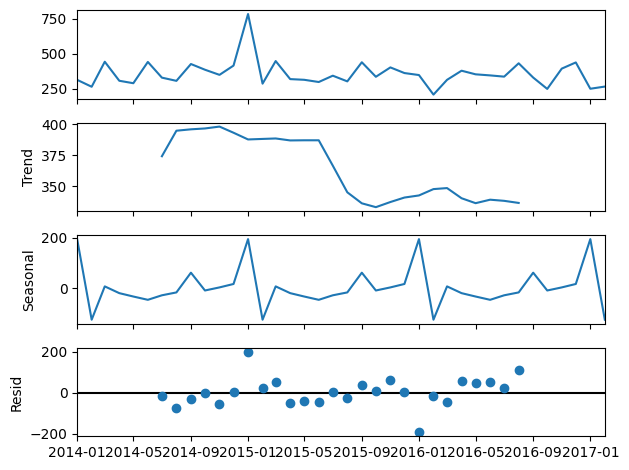

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposer =  seasonal_decompose(train, model='additive' , period=12)
decomposer.plot()
plt.show()

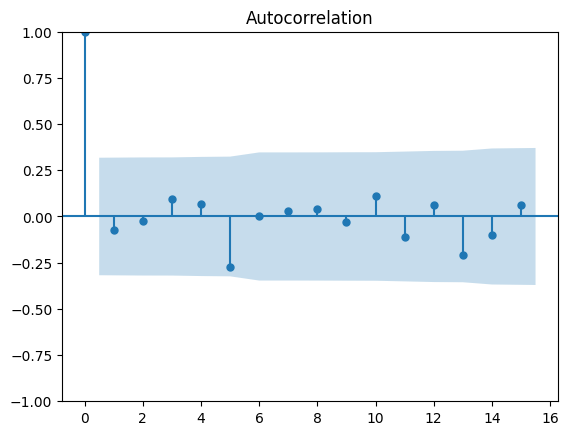

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train, lags=15)
plt.show()

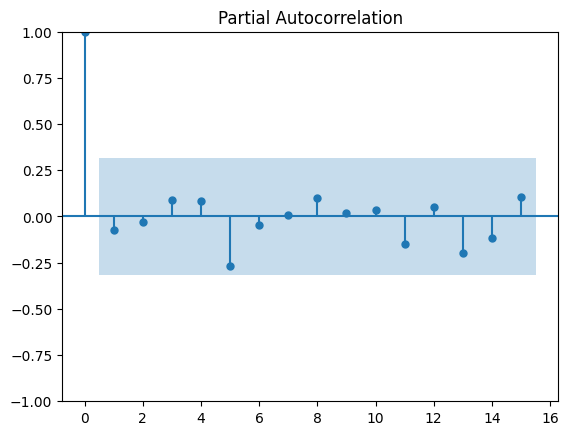

In [96]:
plot_pacf(train, lags=15)
plt.show()

In [104]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(train , order = (0,0,0), seasonal_order=(0,1,0,12))
result = arima.fit()
predict = result.forecast(steps= len(test))

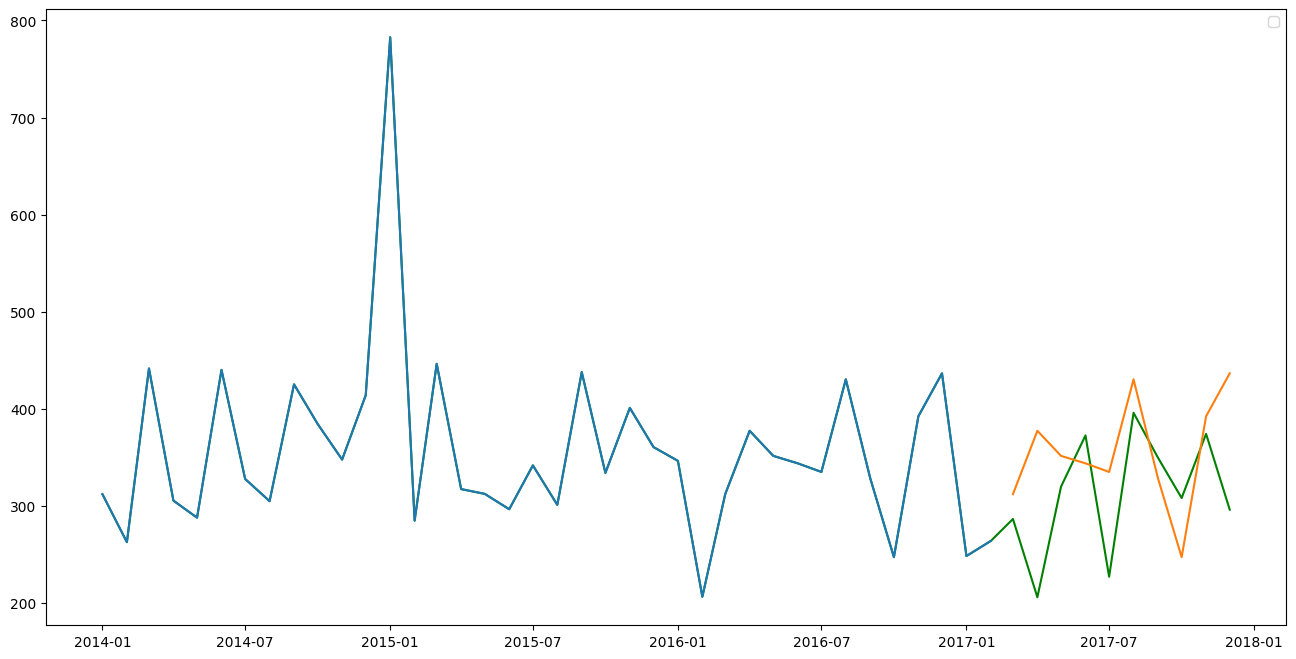

In [129]:
plt.figure(figsize=(16,8))
plt.plot(final_data.index , final_data.Sales,  color = 'green')

plt.plot(train.index , train.Sales)
plt.plot(test.index , predict )
plt.legend()
plt.show()

In [121]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima = SARIMAX(train , order = (0,0,0), seasonal_order=(0,1,0,12) , enforce_invertibility=False ,enforce_stationarity=False )
result = arima.fit()
predict = result.forecast(steps= len(test))

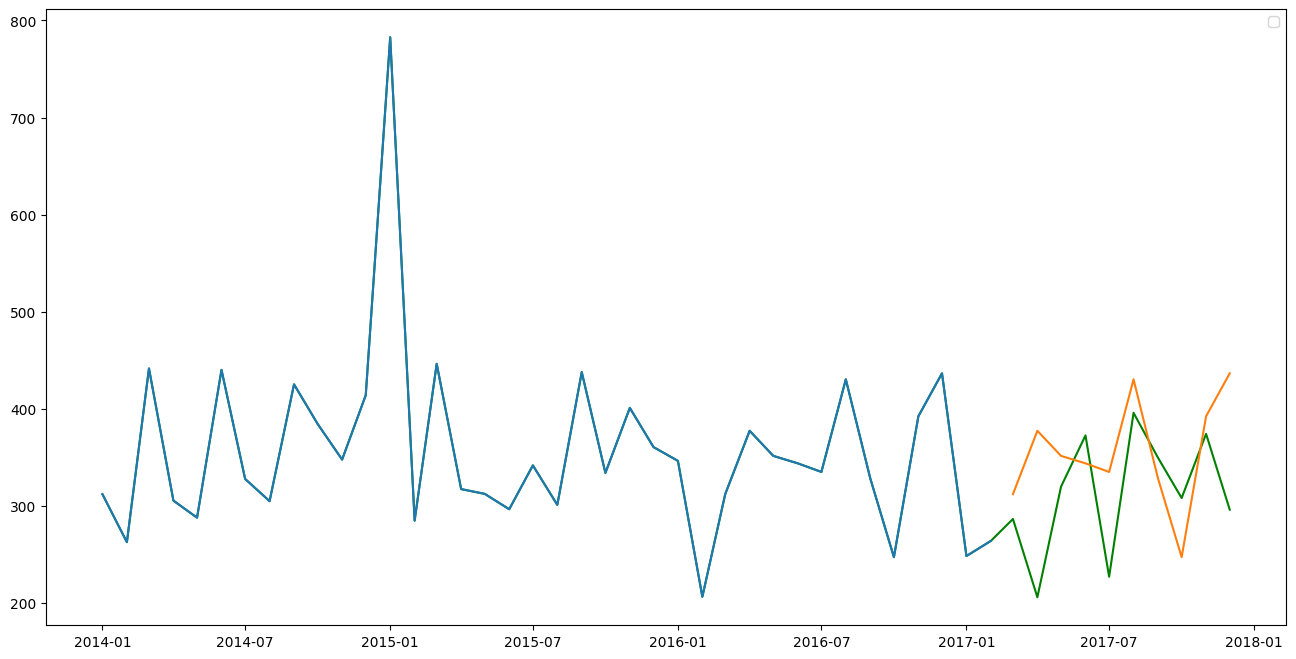

In [128]:
plt.figure(figsize=(16,8))
plt.plot(final_data.index , final_data.Sales,  color = 'green')
plt.plot(train.index , train.Sales)
plt.plot(predict )
plt.legend()
plt.show()